### Codio Activity 9.1: Sequential Feature Selection 

**Expected Time: 60 minutes**

**Total Points: 70**

This activity focuses on using the stepwise feature selection approach outlined in video 9.3.  Here, your goal is to first generate polynomial features for a `degree = 3` model and limit them to a set number using the `SequentialFeatureSelection`. For more information on the selector see [here](https://scikit-learn.org/stable/modules/feature_selection.html#sequential-feature-selection). 

#### Index 

- [Problem 1](#Problem-1)
- [Problem 2](#Problem-2)
- [Problem 3](#Problem-3)
- [Problem 4](#Problem-4)
- [Problem 5](#Problem-5)

In [1]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn import set_config

set_config(display="diagram")

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

### The Data

The dataset used is from kaggle [here](https://www.kaggle.com/mirichoi0218/insurance) and contains information on insurance clients and their medical costs billed by the insurance company.  You will build regression models to predict the logarithm of the `charges`.    The dataset is loaded and displayed below, and the original target is plotted next to its resulting logarithm.   

In [2]:
insurance = pd.read_csv("data/insurance.csv")

In [3]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Text(0.5, 1.0, 'Logarithm of charges')

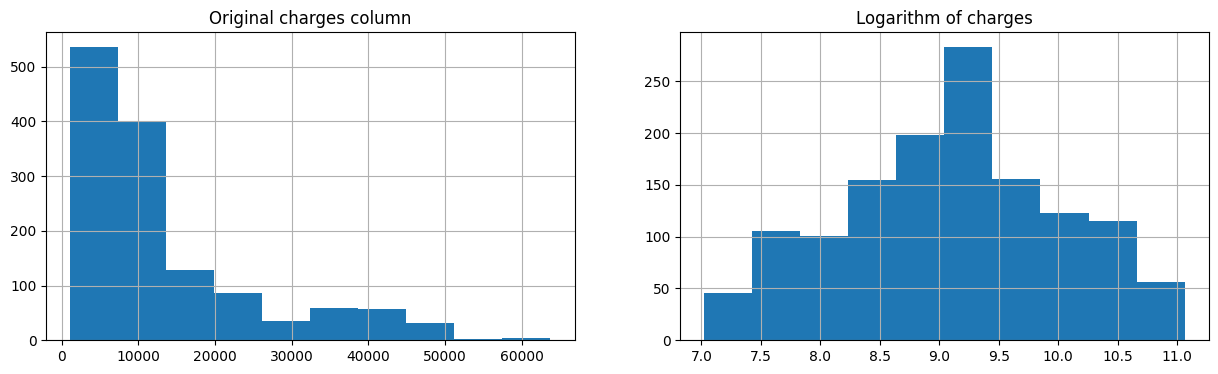

In [5]:
fig, ax = plt.subplots(1, 2, figsize=(15, 4))
ax[0].hist(insurance["charges"])
ax[0].grid()
ax[0].set_title("Original charges column")
ax[1].hist(np.log1p(insurance["charges"]))
ax[1].grid()
ax[1].set_title("Logarithm of charges")

[Back to top](#Index)

### Problem 1

#### Train/Test split

**Points: 10**

Create a train and test set using `train_test_split` and assign to `X_train`, `X_test`, `y_train`, `y_test` below with parameters:

- `test_size = 0.3`
- `random_state = 42`

The target data should be transformed according to the `np.log1p` function.  

In [6]:
(X_train, X_test, y_train, y_test) = train_test_split(
    insurance.drop(columns="charges"),
    np.log1p(insurance["charges"]),
    random_state=42,
    test_size=0.3,
)

# Answer check
print(X_train.shape)
print(X_test.shape)

(936, 6)
(402, 6)


[Back to top](#Index)

### Problem 2

#### Building `PolynomialFeatures`

**Points: 10**

To begin, create a `DataFrame` with the `degree = 3` features and interaction terms added for numeric columns. Assign the following objects to the variables:

- `poly_features`: Instantiate a `PolynomialFeatures` object for quadratic features without a bias term.
- `X_train_poly`: Fit and transformed features using `['age', 'bmi', 'children']`.  
- `X_test_poly`: Transformed test data using `['age', 'bmi', 'children']`.
- `poly_columns`: Column names of transformed data
- `train_df`: DataFrame with training features and column names.
- `test_df`: DataFrame with test features and column names

The DataFrame `train_df` should look like:

'<table border="1" class="dataframe">  <thead>    <tr style="text-align: right;">      <th></th>      <th>age</th>      <th>bmi</th>      <th>children</th>      <th>age^2</th>      <th>age bmi</th>      <th>age children</th>      <th>bmi^2</th>      <th>bmi children</th>      <th>children^2</th>      <th>age^3</th>      <th>age^2 bmi</th>      <th>age^2 children</th>      <th>age bmi^2</th>      <th>age bmi children</th>      <th>age children^2</th>      <th>bmi^3</th>      <th>bmi^2 children</th>      <th>bmi children^2</th>      <th>children^3</th>    </tr>  </thead>  <tbody>    <tr>      <th>0</th>      <td>61.0</td>      <td>31.160</td>      <td>0.0</td>      <td>3721.0</td>      <td>1900.760</td>      <td>0.0</td>      <td>970.945600</td>      <td>0.00</td>      <td>0.0</td>      <td>226981.0</td>      <td>115946.360</td>      <td>0.0</td>      <td>59227.681600</td>      <td>0.0</td>      <td>0.0</td>      <td>30254.664896</td>      <td>0.0000</td>      <td>0.00</td>      <td>0.0</td>    </tr>    <tr>      <th>1</th>      <td>46.0</td>      <td>27.600</td>      <td>0.0</td>      <td>2116.0</td>      <td>1269.600</td>      <td>0.0</td>      <td>761.760000</td>      <td>0.00</td>      <td>0.0</td>      <td>97336.0</td>      <td>58401.600</td>      <td>0.0</td>      <td>35040.960000</td>      <td>0.0</td>      <td>0.0</td>      <td>21024.576000</td>      <td>0.0000</td>      <td>0.00</td>      <td>0.0</td>    </tr>    <tr>      <th>2</th>      <td>54.0</td>      <td>31.900</td>      <td>3.0</td>      <td>2916.0</td>      <td>1722.600</td>      <td>162.0</td>      <td>1017.610000</td>      <td>95.70</td>      <td>9.0</td>      <td>157464.0</td>      <td>93020.400</td>      <td>8748.0</td>      <td>54950.940000</td>      <td>5167.8</td>      <td>486.0</td>      <td>32461.759000</td>      <td>3052.8300</td>      <td>287.10</td>      <td>27.0</td>    </tr>    <tr>      <th>3</th>      <td>55.0</td>      <td>30.685</td>      <td>0.0</td>      <td>3025.0</td>      <td>1687.675</td>      <td>0.0</td>      <td>941.569225</td>      <td>0.00</td>      <td>0.0</td>      <td>166375.0</td>      <td>92822.125</td>      <td>0.0</td>      <td>51786.307375</td>      <td>0.0</td>      <td>0.0</td>      <td>28892.051669</td>      <td>0.0000</td>      <td>0.00</td>      <td>0.0</td>    </tr>    <tr>      <th>4</th>      <td>25.0</td>      <td>45.540</td>      <td>2.0</td>      <td>625.0</td>      <td>1138.500</td>      <td>50.0</td>      <td>2073.891600</td>      <td>91.08</td>      <td>4.0</td>      <td>15625.0</td>      <td>28462.500</td>      <td>1250.0</td>      <td>51847.290000</td>      <td>2277.0</td>      <td>100.0</td>      <td>94445.023464</td>      <td>4147.7832</td>      <td>182.16</td>      <td>8.0</td>    </tr>  </tbody></table>'

In [7]:
poly_features = PolynomialFeatures(degree=3, include_bias=False)
xform_features = ["age", "bmi", "children"]
X_train_poly = poly_features.fit_transform(X_train[xform_features])
X_test_poly = poly_features.fit_transform(X_test[xform_features])
columns = poly_features.get_feature_names_out()
train_df = pd.DataFrame(X_train_poly, columns=columns)
test_df = pd.DataFrame(X_test_poly, columns=columns)

# test_df.to_csv('data/test_cubic.csv', index = False)
# train_df.to_csv('data/train_cubic.csv', index = False)
# ANSWER CHECK
train_df.head()

,age,bmi,children,age^2,age bmi,age children,bmi^2,bmi children,children^2,age^3,age^2 bmi,age^2 children,age bmi^2,age bmi children,age children^2,bmi^3,bmi^2 children,bmi children^2,children^3
0,61.0,31.160,0.0,3721.0,1900.760,0.0,970.945600,0.00,0.0,226981.0,115946.360,0.0,59227.681600,0.0,0.0,30254.664896,0.0000,0.00,0.0
1,46.0,27.600,0.0,2116.0,1269.600,0.0,761.760000,0.00,0.0,97336.0,58401.600,0.0,35040.960000,0.0,0.0,21024.576000,0.0000,0.00,0.0
2,54.0,31.900,3.0,2916.0,1722.600,162.0,1017.610000,95.70,9.0,157464.0,93020.400,8748.0,54950.940000,5167.8,486.0,32461.759000,3052.8300,287.10,27.0
3,55.0,30.685,0.0,3025.0,1687.675,0.0,941.569225,0.00,0.0,166375.0,92822.125,0.0,51786.307375,0.0,0.0,28892.051669,0.0000,0.00,0.0
4,25.0,45.540,2.0,625.0,1138.500,50.0,2073.891600,91.08,4.0,15625.0,28462.500,1250.0,51847.290000,2277.0,100.0,94445.023464,4147.7832,182.16,8.0


In [8]:
test_df

,age,bmi,children,age^2,age bmi,age children,bmi^2,bmi children,children^2,age^3,age^2 bmi,age^2 children,age bmi^2,age bmi children,age children^2,bmi^3,bmi^2 children,bmi children^2,children^3
0,45.0,25.175,2.0,2025.0,1132.875,90.0,633.780625,50.350,4.0,91125.0,50979.375,4050.0,28520.128125,2265.75,180.0,15955.427234,1267.561250,100.700,8.0
1,36.0,30.020,0.0,1296.0,1080.720,0.0,901.200400,0.000,0.0,46656.0,38905.920,0.0,32443.214400,0.00,0.0,27054.036008,0.000000,0.000,0.0
2,64.0,26.885,0.0,4096.0,1720.640,0.0,722.803225,0.000,0.0,262144.0,110120.960,0.0,46259.406400,0.00,0.0,19432.564704,0.000000,0.000,0.0
3,46.0,25.745,3.0,2116.0,1184.270,138.0,662.805025,77.235,9.0,97336.0,54476.420,6348.0,30489.031150,3552.81,414.0,17063.915369,1988.415075,231.705,27.0
4,19.0,31.920,0.0,361.0,606.480,0.0,1018.886400,0.000,0.0,6859.0,11523.120,0.0,19358.841600,0.00,0.0,32522.853888,0.000000,0.000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397,50.0,44.745,0.0,2500.0,2237.250,0.0,2002.115025,0.000,0.0,125000.0,111862.500,0.0,100105.751250,0.00,0.0,89584.636794,0.000000,0.000,0.0
398,36.0,29.700,0.0,1296.0,1069.200,0.0,882.090000,0.000,0.0,46656.0,38491.200,0.0,31755.240000,0.00,0.0,26198.073000,0.000000,0.000,0.0
399,18.0,28.215,0.0,324.0,507.870,0.0,796.086225,0.000,0.0,5832.0,9141.660,0.0,14329.552050,0.00,0.0,22461.572838,0.000000,0.000,0.0
400,58.0,36.080,0.0,3364.0,2092.640,0.0,1301.766400,0.000,0.0,195112.0,121373.120,0.0,75502.451200,0.00,0.0,46967.731712,0.000000,0.000,0.0


[Back to top](#Index)

### Problem 3

#### Using `SequentialFeatureSelector`

**Points: 10**

Now, using the polynomial features you will use forward feature selection to select three features (`n_features_to_select = 3`) using a `LinearRegression` estimator to perform the feature selection on the training data.  Assign your transformed features to `best_features_df` as a DataFrame with appropriate feature names.  The transformer should be instantiated as `selector` and the transformed training data should be assigned to `best_features` as an array.

In [9]:
selector = SequentialFeatureSelector(
    estimator=LinearRegression(),
    n_features_to_select=3,
)

best_features = selector.fit_transform(train_df, y_train)
best_features_df = pd.DataFrame(best_features, columns=selector.get_feature_names_out())
best_features_df.head()

,age,bmi children,age children^2
0,61.0,0.00,0.0
1,46.0,0.00,0.0
2,54.0,95.70,486.0
3,55.0,0.00,0.0
4,25.0,91.08,100.0


[Back to top](#Index)

### Problem 4

#### `Pipeline` for regression model

**Points: 20**


Now, create a `Pipeline` object with steps `column_selector` to select three features, and `linreg` to build a `LinearRegression` estimator.  Determine the Mean Squared Error on the train and test set respectively and assign to `train_mse` and `test_mse` as a float. Be sure to use `train_df` and `test_df` from above for fitting and predicting.

In [10]:
pipe = Pipeline(
    [
        (
            "column_selector",
            SequentialFeatureSelector(
                estimator=LinearRegression(), n_features_to_select=3
            ),
        ),
        ("linreg", LinearRegression()),
    ]
)

pipe.fit(train_df, y_train)

train_preds = pipe.predict(train_df)
test_preds = pipe.predict(test_df)
train_mse = mean_squared_error(y_train, train_preds)
test_mse = mean_squared_error(y_test, test_preds)

# Answer check
print(f"Train MSE: {train_mse: .2f}")
print(f"Test MSE: {test_mse: .2f}")
pipe

Train MSE:  0.60
Test MSE:  0.56


Pipeline(steps=[('column_selector',
                 SequentialFeatureSelector(estimator=LinearRegression(),
                                           n_features_to_select=3)),
                ('linreg', LinearRegression())])

[Back to top](#Index)

#### Problem 5

#### Backward Selction

**Points: 20**

Similar to the forward selection method, backward selection starts with all features and sequentially eliminates features until the threshold is achieved.  Use the selector `backward_selector` below to again build a pipeline named `backward_pipe` and fit a `LinearRegression` model using three features from `train_df`. 

Assign the train and test mean squared errors as `backward_train_mse` and `backward_test_mse` respectively.

In [11]:
backward_selector = SequentialFeatureSelector(
    LinearRegression(), n_features_to_select=3, direction="backward"
)

In [12]:
backward_pipe = Pipeline(
    [
        ("column_selector", backward_selector),
        ("linreg", LinearRegression()),
    ]
)

backward_pipe.fit(train_df, y_train)
backward_train_mse = mean_squared_error(y_train, backward_pipe.predict(train_df))
backward_test_mse = mean_squared_error(y_test, backward_pipe.predict(test_df))

# Answer check
print(f"Train MSE: {backward_train_mse: .2f}")
print(f"Test MSE: {backward_test_mse: .2f}")
backward_pipe

Train MSE:  0.60
Test MSE:  0.57


Pipeline(steps=[('column_selector',
                 SequentialFeatureSelector(direction='backward',
                                           estimator=LinearRegression(),
                                           n_features_to_select=3)),
                ('linreg', LinearRegression())])

#### Further Exploration

As an optional exercise work on incorporating the `PolynomialFeatures` into the pipeline along with a `TransformedTargetRegressor` to further abstract the modeling process.  